<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [2]:
url = 'https://raw.githubusercontent.com/Ajay-user/DataScience/master/Regression/Datasets/50_Startups.csv'
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# check for null values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

* we have to One-hot-encode the categorical variable -- State column
* instantiate a Regression model
* create a pipeline combining data transformation step and modelling
* train & evaluate the model using the pipeline 

In [15]:
transformer = make_column_transformer((OneHotEncoder(),['State']), remainder='passthrough')

In [16]:
regressor = LinearRegression()

In [17]:
pipeline = make_pipeline(transformer, regressor)

In [21]:
X = df.drop(columns=['Profit'], axis=1)
y = df['Profit']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# training 
pipeline.fit(X_train, y_train)

# making predictions
y_preds = pipeline.predict(X_test)

In [24]:
# evaluation
pipeline.score(X_test, y_test)

0.8987266414319001

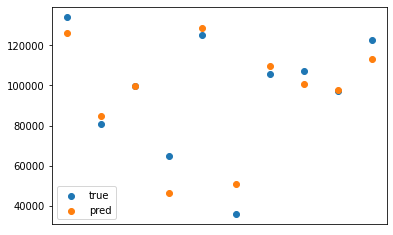

In [33]:
plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), y_preds)
plt.legend(['true', 'pred'])
plt.xticks([])
plt.show()